# Seminar RIT851
# Wine Quality Test Project
##### using machine learning with python

#### Collecting dataset from "kaggle"
This dataset is available on kaggle.

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/home/g-host/Documents/Final_Year_Project/Seminar'

In [3]:
# Load the dataset
wine_data = pd.read_csv("./Wine_Quality_Test_data.csv")

In [4]:
#### check how dataset is distributed with head function
wine_data.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [5]:
# information about rows and columns
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# checking the missing values
# cal total no of missing values
MissVal = wine_data.isnull().sum()
print('total missing values:',MissVal)

total missing values: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


As we can see above there is no missing values in data

i.e data is already cleaned

#### Let's plot bargraph between columns

## Assumption
#### We will be assuming that wine having value of quality more than 6 is good and less than 6 is bad

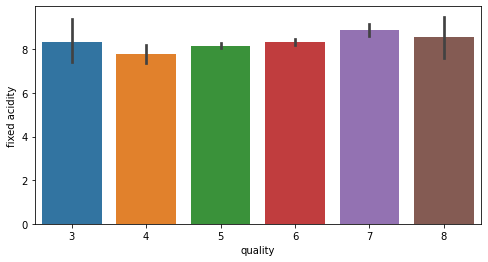

In [9]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)

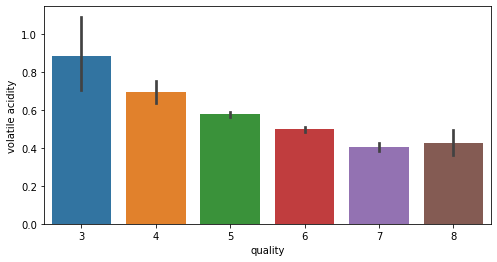

In [10]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

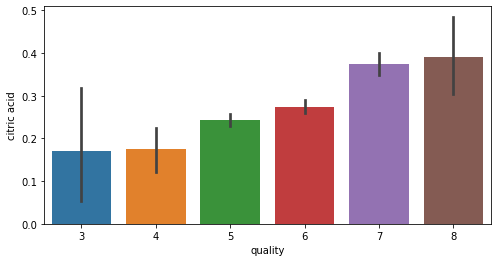

In [11]:
#Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)

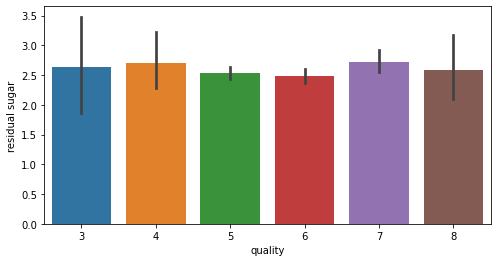

In [12]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_data)

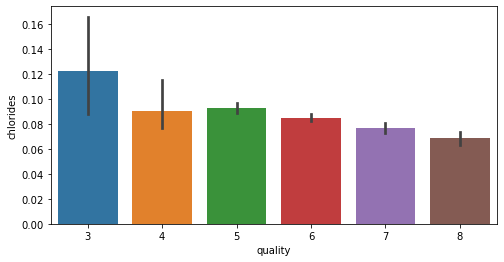

In [13]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data)

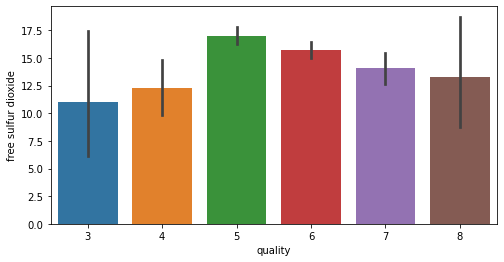

In [14]:
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data)

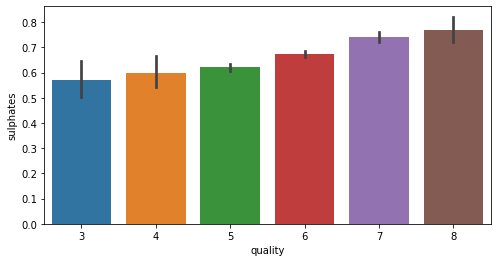

In [15]:
#Sulphates level goes higher with the quality of wine

fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)

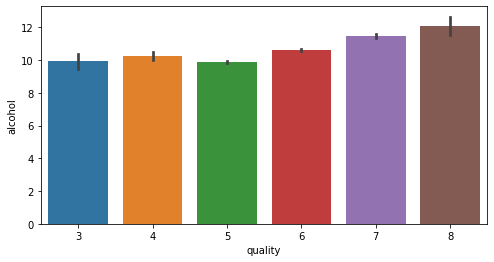

In [16]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_data)

#### apply machine learning algorithms

In [17]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data['quality'] = pd.cut(wine_data['quality'], bins = bins, labels = group_names)

#### Now lets assign a labels to our quality variable

In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline


In [19]:
label_quality = LabelEncoder()

In [20]:
#Bad becomes 0 and good becomes 1 

wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])

In [21]:
wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

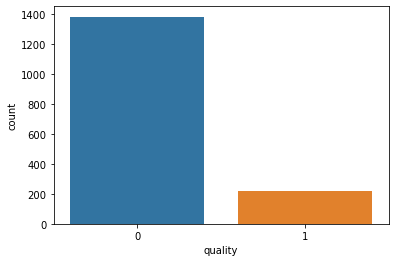

In [22]:
sns.countplot(wine_data['quality'])

In [23]:
#Now seperate the dataset as response variable and feature variabes

X = wine_data.drop('quality', axis = 1)
y = wine_data['quality']

In [24]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [25]:

#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [26]:

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Our training and testing data is ready now to perform machine learning algorithm

## Random Forest Classifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [28]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.36      0.46        47

    accuracy                           0.88       320
   macro avg       0.76      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



In [29]:
#Confusion matrix for the random forest classification

cm = confusion_matrix(y_test, pred_rfc)
print(cm)

[[263  10]
 [ 30  17]]


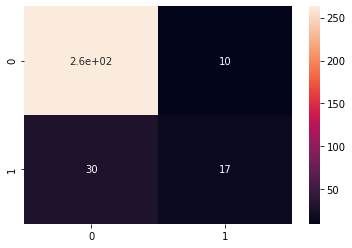

In [30]:
# Plotting confusion matrix

sns.heatmap(cm, annot=True, cbar=True)

#### Stochastic Gradient Decent Classifier

In [31]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [32]:

print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       273
           1       0.49      0.38      0.43        47

    accuracy                           0.85       320
   macro avg       0.69      0.66      0.67       320
weighted avg       0.84      0.85      0.84       320



In [33]:
# Now accuracy with Stochastic Gradient Decent Classifier

cm = confusion_matrix(y_test, pred_sgd)
print(cm)

[[254  19]
 [ 29  18]]


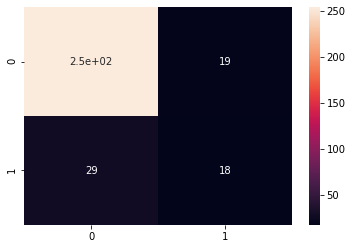

In [34]:
# Plotting confusion matrix

sns.heatmap(cm, annot=True, cbar=True)

### Support Vector Classifier

In [35]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [36]:
# for support vector classifier
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



#### Let's try to increase our accuracy of models
## Grid Search CV

In [37]:
#Finding best parameters for our SVC model
param = { 'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],'kernel':['linear', 'rbf'], 'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4] }
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)


In [38]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [39]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [40]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



#### SVC improves from 86% to 90% using Grid Search CV

##### Cross Validation Score for random forest and SGD

In [41]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.913238188976378

## Random forest accuracy increases from 87% to 91.4 % using cross validation score

### Making Prediction with rfc

In [54]:
y_pred = rfc.predict(X_test)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.values.reshape(-1, 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]